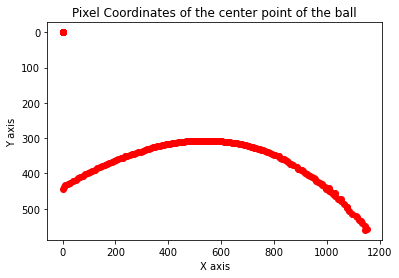

Parabola equation: y = 0.0006033537799284626 x^2 + -0.6017913823053869 x + 454.86542586961576


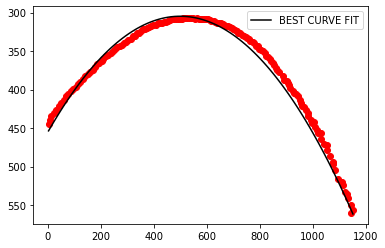

The x-coordinate of theball landing spot is 1352.86 pixels


In [15]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
a, b, c = coeff

# Reading the video FILE
video = cv.VideoCapture("ball.mov")

# Storing Pixel Co-ordinates in the arrays
x = []
y = []

###############################################################
#problem 1.1: Plotting the Center Coordinates of the ball#####
################################################################

while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break
    else:
        # Converting Colour to HSV Space
        HSV = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

        # Filtering Red Channel
        red_lower = np.array([0, 135, 135])
        red_upper = np.array([4, 250, 250])

        # Masking the ball
        mask = cv.inRange(HSV, red_lower, red_upper)
        masked_img = cv.bitwise_and(frame, frame, mask=mask)

        #Finding Center of the Ball
        center = np.nonzero(masked_img)
        if len(center[0] > 0):
            c_x = int(np.mean(center[1]))
            c_y = int(np.mean(center[0]))
        else:
            c_x, c_y = 0, 0

        # Making the array of X and Y co-ordinates of the center points of the ball.
        x.append(c_x)
        y.append(c_y)

# Releasing the video
video.release()

# Plotting the center point of the ball
plt.scatter(x, y, color="red")
plt.gca().invert_yaxis()
plt.title("Pixel Coordinates of the center point of the ball")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()


##################################################################
### Problem 1.2: Fitting the Curve Using Standard Least Squares###
#################################################################


#Converting X and Y to arrays
x=np.array(x)
y=np.array(y)

#Masking the Data Points at (0,0)
remove = (x != 0) & (y != 0)
x = x[remove]
y = y[remove]

# Fit a quadratic curve to the coordinates using least squares
x2 = np.power(x,2)
X = np.column_stack([x2 , x, np.ones(len(x))])
Y = np.row_stack(y)
E = np.matmul(X.T, X)
F = np.linalg.inv(E)
R = np.matmul(F, X.T)
B = np.matmul(R, Y)

# Print the equation of the curve

print(f"Parabola equation: y = {a} x^2 + {b} x + {c}")

# Plot the data with the best fit curve
x_plot = np.linspace(x.min(), x.max(), 100)
y_plot = a*x_plot**2 + b*x_plot + c
plt.scatter(x,y, color = "red")
plt.plot(x_plot, y_plot, color='black', label='BEST CURVE FIT')
plt.gca().invert_yaxis()
plt.legend()
plt.show()


#######################################################################
####Problem 1.3: Finding the X Co-ordinates of the ball Landing Spot###
#######################################################################


y_1 = y[0]
y_landing = y_1 + 300
x_landing = (-b + np.sqrt(b**2 - 4*a*(c - y_landing))) / (2*a)

print(f"The x-coordinate of theball landing spot is {x_landing:.2f} pixels")